In [1]:
# Originalquelle: https://www.kaggle.com/danielgrijalvas/movies
# Der Originaldatensatz wurde vorab mittels Excel bereinigt.
# Modifizierter Datensatz: 


# Tools und Bibliotheken:  : Python, Jupyter Notebook, pandas, seaborn, numpy, mathplotlib

# Überblick: Datensatz Prüfen, bereinigen und anpassen.
#            Visualisierung von Korrelation und Ausgleichsgerade als Scatterplot.
#            Berechnung der Korrelation nach Pearson, Kendall und Spearman.
#            Korrelationsmatrix, numerische Repräsentanten, Unstacking

## Annahmen: 
## 1) Je größer das Budget, desto höher der Bruttoumsatz des Films
## 2) Große Unternehmen erzielen  höhere Bruttoumsätze
## 3) Votes und Budget haben eine hohe Korrelation zum Bruttoumsatz

In [2]:
## Bibliotheken importieren

from xml.etree.ElementInclude import include
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = 12,8 # Anpassen der Plotkonfiguration

# Daten einlesen 
pd.options.display.max_rows = 300
df = pd.read_csv (r'C:\Pfad\zur\Datenquelle\movies.csv')

In [3]:
# Daten anschauen

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,1980-06-13,146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,1980-07-02,104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,1980-06-20,124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,1980-07-02,88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,1980-07-25,98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [4]:
# Auf fehlende Daten Prüfen

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [5]:
## Datensatz bereinigen
# Datentypen

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [6]:
# Datentypen anpassen

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['gross'].astype('int64')
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,1980-06-13,146.0,8.4,Jack Nicholson,46998772,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,1980-07-02,104.0,5.8,Brooke Shields,58853106,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,1980-06-20,124.0,8.7,Mark Hamill,538375067,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,1980-07-02,88.0,7.7,Robert Hays,83453539,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,1980-07-25,98.0,7.3,Chevy Chase,39846344,Brian Doyle-Murray,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,90000000,Columbia Pictures,United States,Adil El Arbi,Action,426505244,Bad Boys for Life,R,2020-01-17,124.0,6.6,Will Smith,426505244,Peter Craig,2020
5417,85000000,Paramount Pictures,United States,Jeff Fowler,Action,319715683,Sonic the Hedgehog,PG,2020-02-14,99.0,6.5,Ben Schwartz,319715683,Pat Casey,2020
5418,175000000,Universal Pictures,United States,Stephen Gaghan,Adventure,245487753,Dolittle,PG,2020-01-17,101.0,5.6,Robert Downey Jr.,245487753,Stephen Gaghan,2020
5419,135000000,20th Century Studios,Canada,Chris Sanders,Adventure,111105497,The Call of the Wild,PG,2020-02-21,100.0,6.8,Harrison Ford,111105497,Michael Green,2020


In [7]:
# Jahreszahlen korrigieren

df['yearcorrect'] = df['released'].astype(str).str[0:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,1980-06-13,146.0,8.4,Jack Nicholson,46998772,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,1980-07-02,104.0,5.8,Brooke Shields,58853106,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,1980-06-20,124.0,8.7,Mark Hamill,538375067,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,1980-07-02,88.0,7.7,Robert Hays,83453539,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,1980-07-25,98.0,7.3,Chevy Chase,39846344,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,90000000,Columbia Pictures,United States,Adil El Arbi,Action,426505244,Bad Boys for Life,R,2020-01-17,124.0,6.6,Will Smith,426505244,Peter Craig,2020,2020
5417,85000000,Paramount Pictures,United States,Jeff Fowler,Action,319715683,Sonic the Hedgehog,PG,2020-02-14,99.0,6.5,Ben Schwartz,319715683,Pat Casey,2020,2020
5418,175000000,Universal Pictures,United States,Stephen Gaghan,Adventure,245487753,Dolittle,PG,2020-01-17,101.0,5.6,Robert Downey Jr.,245487753,Stephen Gaghan,2020,2020
5419,135000000,20th Century Studios,Canada,Chris Sanders,Adventure,111105497,The Call of the Wild,PG,2020-02-21,100.0,6.8,Harrison Ford,111105497,Michael Green,2020,2020


In [8]:
# Sortieren nach Bruttoumsatz des Films
df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
3731,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,2009-12-18,162.0,7.8,Sam Worthington,2847246203,James Cameron,2009,2009
5302,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,2019-04-26,181.0,8.4,Robert Downey Jr.,2797501328,Christopher Markus,2019,2019
1795,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,1997-12-19,194.0,7.8,Leonardo DiCaprio,2201647264,James Cameron,1997,1997
4730,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,2015-12-18,138.0,7.8,Daisy Ridley,2069521700,Lawrence Kasdan,2015,2015
5158,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,2018-04-27,149.0,8.4,Robert Downey Jr.,2048359754,Christopher Markus,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3000000,Two Prong Lesson,United States,Francesca Gregorini,Drama,5073,Tanner Hall,R,2015-01-15,96.0,5.8,Rooney Mara,5073,Tatiana von Fürstenberg,2009,2015
1378,5000000,Trimark Pictures,United States,Stephen Cornwell,Action,2970,Philadelphia Experiment II,PG-13,1994-06-04,97.0,4.5,Brad Johnson,2970,Wallace C. Bennett,1993,1994
2286,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Ginger Snaps,Not Rated,2001-05-11,108.0,6.8,Emily Perkins,2554,Karen Walton,2000,2001
154,800000,Embassy Pictures,United States,Charles Band,Horror,2270,Parasite,R,1982-03-12,85.0,3.9,Robert Glaudini,2270,Alan J. Adler,1982,1982


In [9]:
# Duplikate entfernen
df = df.drop_duplicates()
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,1980-06-13,146.0,8.4,Jack Nicholson,46998772,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,1980-07-02,104.0,5.8,Brooke Shields,58853106,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,1980-06-20,124.0,8.7,Mark Hamill,538375067,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,1980-07-02,88.0,7.7,Robert Hays,83453539,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,1980-07-25,98.0,7.3,Chevy Chase,39846344,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,90000000,Columbia Pictures,United States,Adil El Arbi,Action,426505244,Bad Boys for Life,R,2020-01-17,124.0,6.6,Will Smith,426505244,Peter Craig,2020,2020
5417,85000000,Paramount Pictures,United States,Jeff Fowler,Action,319715683,Sonic the Hedgehog,PG,2020-02-14,99.0,6.5,Ben Schwartz,319715683,Pat Casey,2020,2020
5418,175000000,Universal Pictures,United States,Stephen Gaghan,Adventure,245487753,Dolittle,PG,2020-01-17,101.0,5.6,Robert Downey Jr.,245487753,Stephen Gaghan,2020,2020
5419,135000000,20th Century Studios,Canada,Chris Sanders,Adventure,111105497,The Call of the Wild,PG,2020-02-21,100.0,6.8,Harrison Ford,111105497,Michael Green,2020,2020


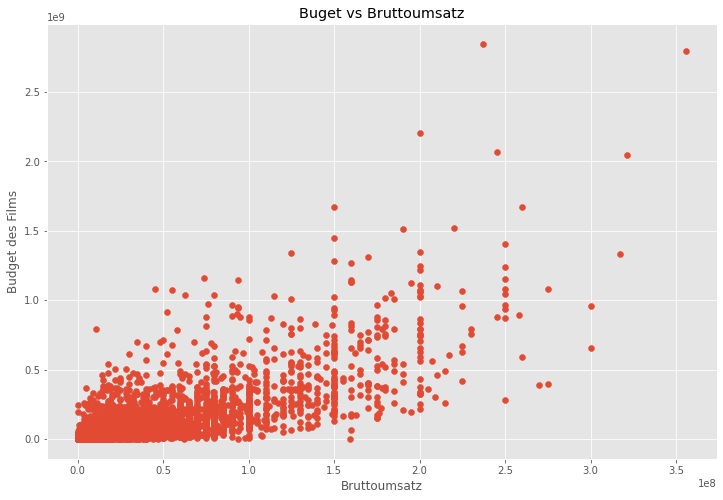

In [10]:
## Korrelation
# Scatter Plot Budget zu Bruttoumsatz

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Buget vs Bruttoumsatz')
plt.xlabel('Bruttoumsatz')
plt.ylabel('Budget des Films')
plt.show()

Text(0, 0.5, 'Budget des Films')

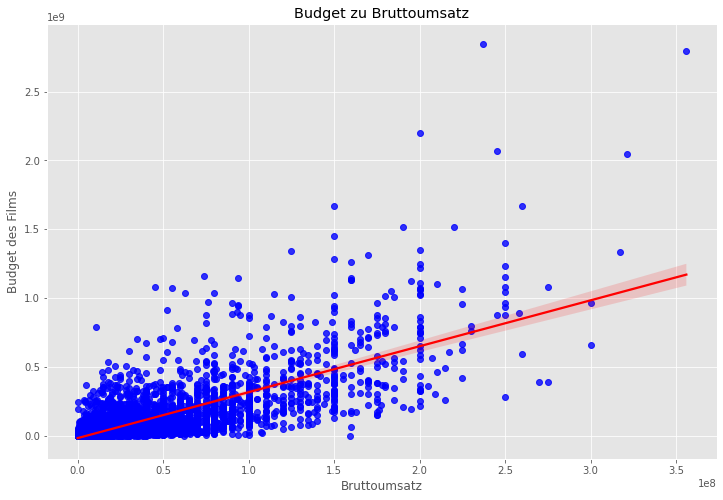

In [11]:
# Seaborn Scatter Plot mit Regressionsgerade von Budget zu Bruttoumsatz

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"red"}).set(title='Budget zu Bruttoumsatz')
plt.xlabel('Bruttoumsatz')
plt.ylabel('Budget des Films')

In [12]:
# Korrelation berechnen
# Korrelation nach Pearson

df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.740247,0.327722
gross,0.740247,1.000000,0.275796,0.222556,1.000000,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.275796,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.222556,0.056386
votes,0.740247,1.000000,0.275796,0.222556,1.000000,0.274321
year,0.327722,0.274321,0.075077,0.056386,0.274321,1.000000


In [13]:
# Korrelation nach Kendall

df.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.512057,0.231278,-0.006406,0.512057,0.220833
gross,0.512057,1.000000,0.176979,0.124943,1.000000,0.239539
runtime,0.231278,0.176979,1.000000,0.292254,0.176979,0.064824
score,-0.006406,0.124943,0.292254,1.000000,0.124943,0.039389
votes,0.512057,1.000000,0.176979,0.124943,1.000000,0.239539
year,0.220833,0.239539,0.064824,0.039389,0.239539,1.000000


In [14]:
# Korrelation nach Spearman

df.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.692958,0.330794,-0.009971,0.692958,0.312886
gross,0.692958,1.000000,0.257400,0.183192,1.000000,0.351045
runtime,0.330794,0.257400,1.000000,0.412155,0.257400,0.095444
score,-0.009971,0.183192,0.412155,1.000000,0.183192,0.057741
votes,0.692958,1.000000,0.257400,0.183192,1.000000,0.351045
year,0.312886,0.351045,0.095444,0.057741,0.351045,1.000000


In [15]:
# Schlussfolgerung zu Hypothese Nr.1:
# 1) Je größer das Budget, desto höher der Bruttoumsatz des Films
# Hypothese Nr.1 ist somit durch die vorliegende positive Korrelation bestätigt.

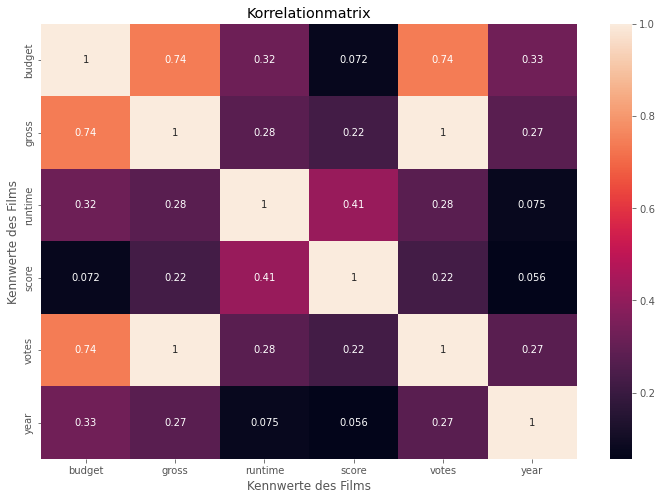

In [16]:
# Korrelationsmatrix  für Budget zu Bruttoumsatz nach Pearson

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Korrelationmatrix')
plt.xlabel('Kennwerte des Films')
plt.ylabel('Kennwerte des Films')
plt.show()

In [17]:
# Numerische Repräsentanten bilden

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000,1426,46,1795,6,46998772,4692,6,22,146.0,8.4,699,46998772,2832,1980,9
1,4500000,452,47,1578,1,58853106,3929,6,28,104.0,5.8,214,58853106,1158,1980,9
2,18000000,945,47,757,0,538375067,3641,4,24,124.0,8.7,1157,538375067,1818,1980,9
3,3500000,1108,47,889,4,83453539,204,4,28,88.0,7.7,1474,83453539,1413,1980,9
4,6000000,1083,47,719,4,39846344,732,6,30,98.0,7.3,271,39846344,351,1980,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,90000000,452,47,16,0,426505244,415,6,2372,124.0,6.6,1812,426505244,2390,2020,49
5417,85000000,1108,47,852,0,319715683,3556,4,2374,99.0,6.5,147,319715683,2309,2020,49
5418,175000000,1397,47,1809,1,245487753,1153,4,2372,101.0,5.6,1470,245487753,2827,2020,49
5419,135000000,12,6,294,1,111105497,3978,4,2375,100.0,6.8,640,111105497,2091,2020,49


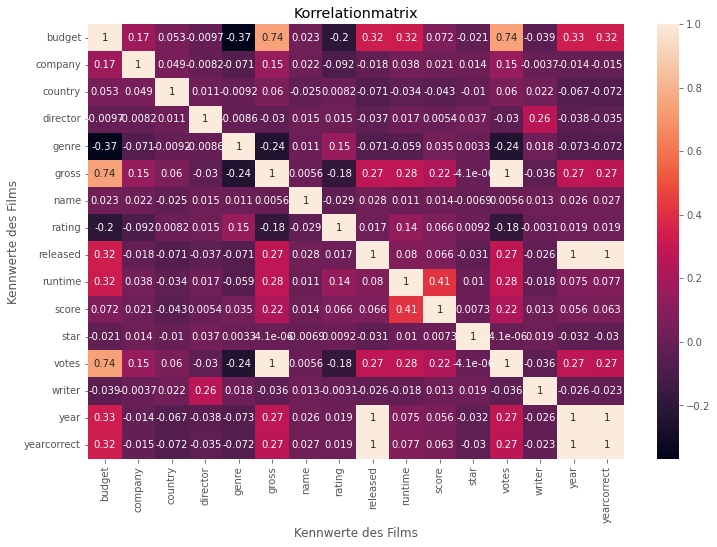

In [18]:
# Korrelationsmatrix für alle Kennwerte
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Korrelationmatrix')
plt.xlabel('Kennwerte des Films')
plt.ylabel('Kennwerte des Films')
plt.show()

In [19]:
# Unstacking der Korrelationskoeffiziente

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.170235
             country        0.052977
             director      -0.009662
             genre         -0.368523
             gross          0.740247
             name           0.023392
             rating        -0.203946
             released       0.322135
             runtime        0.318695
             score          0.072001
             star          -0.021473
             votes          0.740247
             writer        -0.039466
             year           0.327722
             yearcorrect    0.321534
company      budget         0.170235
             company        1.000000
             country        0.048569
             director      -0.008223
             genre         -0.071334
             gross          0.149553
             name           0.021697
             rating        -0.092357
             released      -0.017603
             runtime        0.037585
             score          0.020656
 

In [20]:
# Schlussfolgerung zu Hypothese Nr.2:
# 2) Große Unternehmen erzielen höhere Bruttoumsätze
# Hypothese Nr.2 wird durch die hier geringe Korrelation von 0,17 nicht getragen.

In [21]:
# Ausgeben aller hohen Korrelationskoeffizienten

sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        budget         0.740247
budget       votes          0.740247
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.995222
yearcorrect  year           0.995222
year         released       0.996274
released     year           0.996274
yearcorrect  released       0.997843
released     yearcorrect    0.997843
budget       budget         1.000000
writer       writer         1.000000
company      company        1.000000
country      country        1.000000
director     director       1.000000
genre        genre          1.000000
gross        gross          1.000000
             votes          1.000000
year         year           1.000000
name         name           1.000000
released     released       1.000000
runtime      runtime        1.000000
score        score          1.000000
star         star           1.000000
votes        gross          1.000000
             votes          1.000000
rating       rating         1.000000
y

In [22]:
# Schlussfolgerung zu Hypothese Nr.3:
# 3) Votes und Budget haben eine hohe Korrelation zum Bruttoumsatz
# Hypothese Nr.3 wird durch eine Korrelation von hier 0,74 bestätigt.